# Scikit-Learn

Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection, model evaluation, and many other utilities. Key concepts and features include:

Algorithmic decision-making methods, including:

**Classification:** identifying and categorizing data based on patterns.

**Regression:** predicting or projecting data values based on the average mean of existing and planned data.

**Clustering:** automatic grouping of similar data into datasets.

Algorithms that support predictive analysis ranging from simple linear regression to neural network pattern recognition.

Interoperability with NumPy, pandas, and matplotlib libraries.

# Scikit-Learn & KNN

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Set Theme
sns.set_theme()
df = pd.read_csv("Cancer_Detection.csv")
X = df[["radius_mean","texture_mean"]].to_numpy()


In [22]:
# Define labeling function
def make_labels(y):
    if y == "B":
        return 0
    else:
        return 1
       
# Create target value array
y = df["diagnosis"].map(make_labels).to_numpy()

# Create a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 13)

# Instantiate a KNN classifier 
clf = KNeighborsClassifier(n_neighbors = 7)

In [23]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [24]:
print(f"clf.predict(X_test) = {clf.predict(X_test)} \n")
y_pred = clf.predict(X_test)

print(f"y_pred == y_test = {y_pred == y_test} \n")

print(f"sum(y_pred == y_test)/len(y_test) = {sum(y_pred == y_test)/len(y_test)}")

clf.predict(X_test) = [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0
 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0
 0 0 0] 

y_pred == y_test = [False  True  True False  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True False False  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  T

In [25]:
# Calculate the accuracy
clf.score(X_test, y_test)

0.8936170212765957

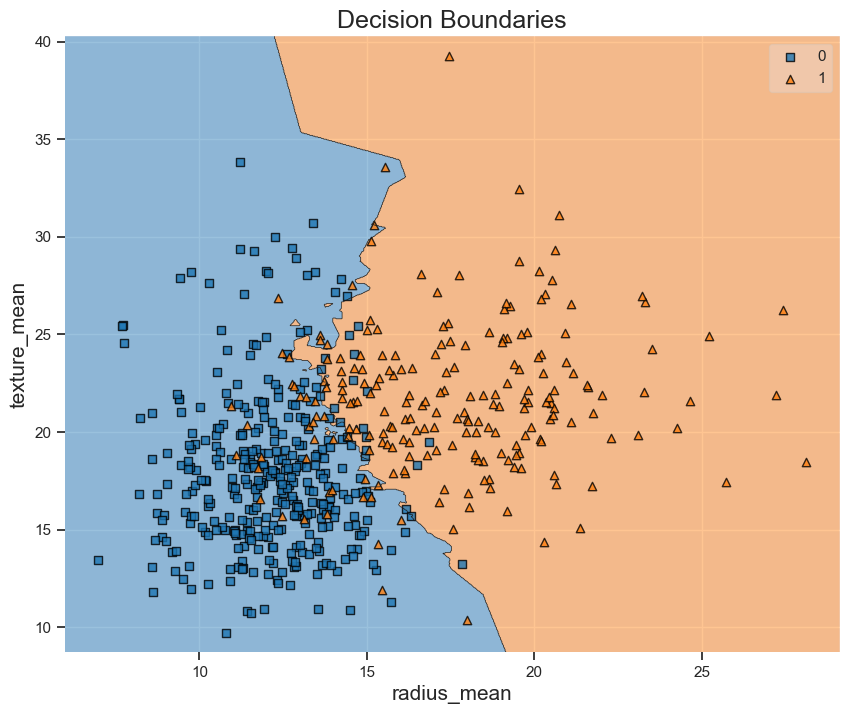

In [26]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = clf)
plt.xlabel("radius_mean", fontsize = 15)
plt.ylabel("texture_mean", fontsize = 15)
plt.title("Decision Boundaries", fontsize = 18)
plt.show()

## The Confusion Matrix

cf_matrix = [[120   8]
 [ 12  48]] 



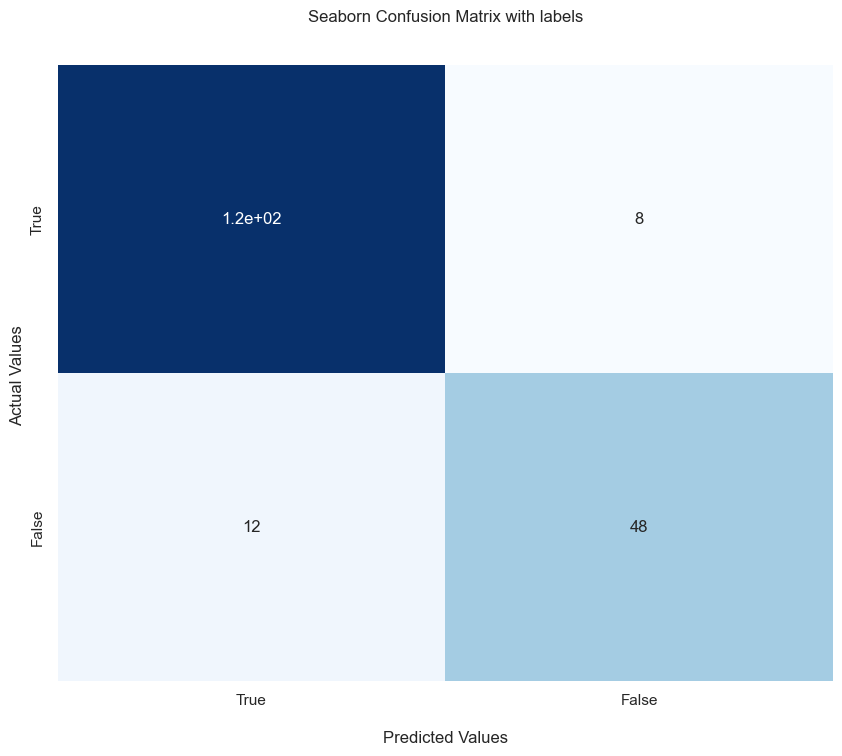

In [27]:
from sklearn.metrics import confusion_matrix

# Define the model
clf = KNeighborsClassifier(n_neighbors = 7)

# Fit the model
clf.fit(X_train,y_train)

# Make predictions on testing data
y_pred = clf.predict(X_test)

# Calculate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix 
print(f"cf_matrix = {cf_matrix} \n")

# View the confusion matrix using the seaborn package
plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True', 'False'])
ax.yaxis.set_ticklabels(['True','False'])
plt.show()


In [28]:
from sklearn.metrics import classification_report

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       128
           1       0.86      0.80      0.83        60

    accuracy                           0.89       188
   macro avg       0.88      0.87      0.88       188
weighted avg       0.89      0.89      0.89       188



# Scikit-Learn & Logistic Regression

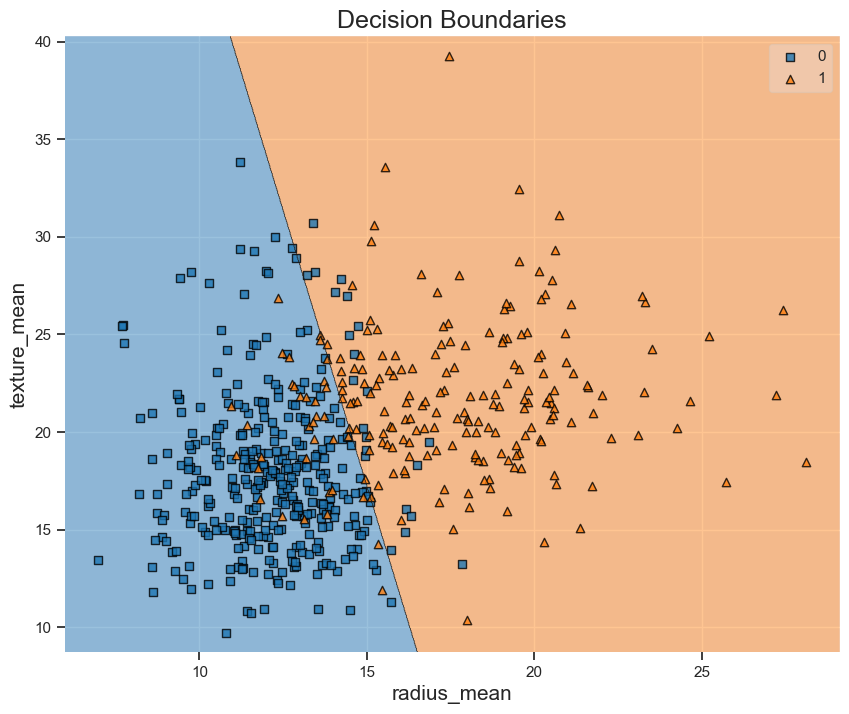

In [29]:
from sklearn.linear_model import LogisticRegression

clf2 = LogisticRegression(max_iter = 10_000)
clf2.fit(X_train, y_train)

log_y_pred = clf2.predict(X_test)

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = clf2)
plt.xlabel("radius_mean", fontsize = 15)
plt.ylabel("texture_mean", fontsize = 15)
plt.title("Decision Boundaries", fontsize = 18)
plt.show()

cf_matrix = [[117  11]
 [ 11  49]] 



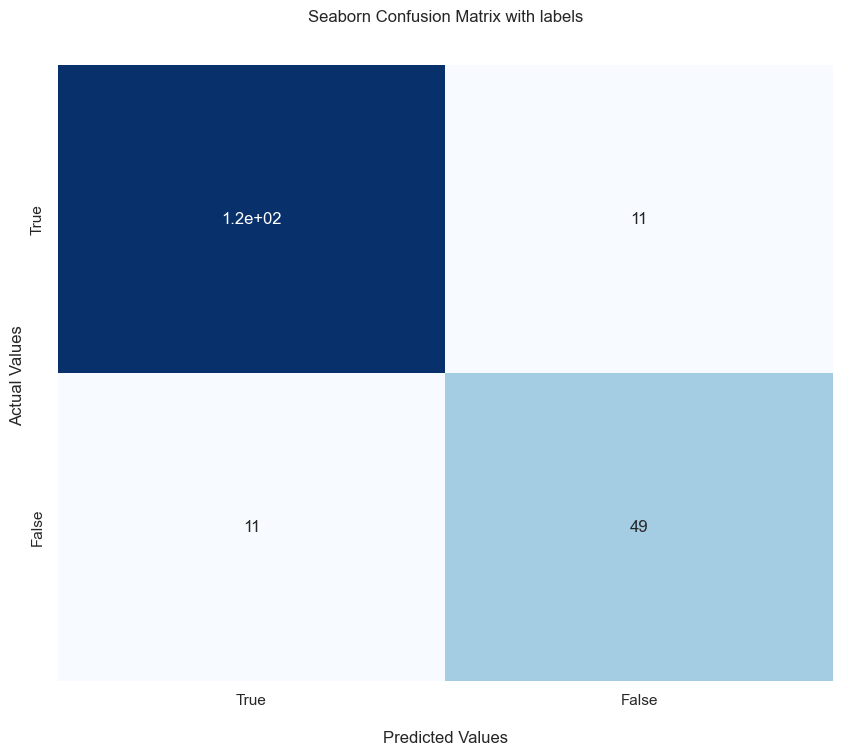

In [30]:
# Calculate the confusion matrix
cf_matrix = confusion_matrix(y_test, log_y_pred)

# Print the confusion matrix 
print(f"cf_matrix = {cf_matrix} \n")

# View the confusion matrix using the seaborn package
plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True', 'False'])
ax.yaxis.set_ticklabels(['True','False'])
plt.show()

In [31]:
#Checking performance our model with classification report.
print(classification_report(y_test, log_y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       128
           1       0.82      0.82      0.82        60

    accuracy                           0.88       188
   macro avg       0.87      0.87      0.87       188
weighted avg       0.88      0.88      0.88       188



# Scikit-Learn & Neural Network

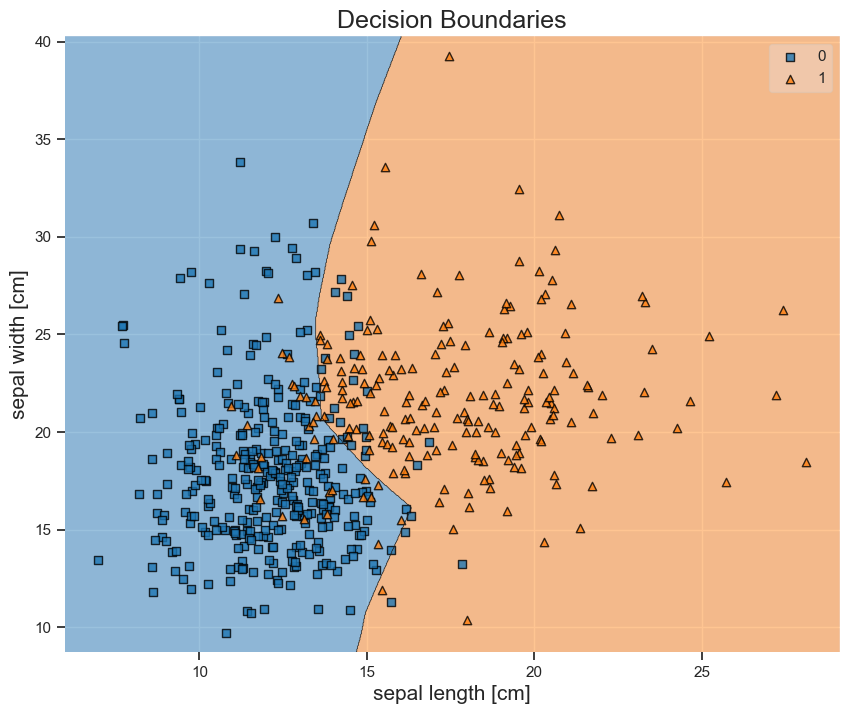

In [32]:
from sklearn.neural_network import MLPClassifier
clf3 = MLPClassifier(solver='lbfgs', alpha= 0.33,
                   hidden_layer_sizes=(120, 120), random_state=1, max_iter = 50_000)

clf3.fit(X_train, y_train)
net_y_pred = clf3.predict(X_test)

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = clf3)
plt.xlabel("sepal length [cm]", fontsize = 15)
plt.ylabel("sepal width [cm]", fontsize = 15)
plt.title("Decision Boundaries", fontsize = 18)
plt.show()

cf_matrix = [[115  13]
 [  9  51]] 



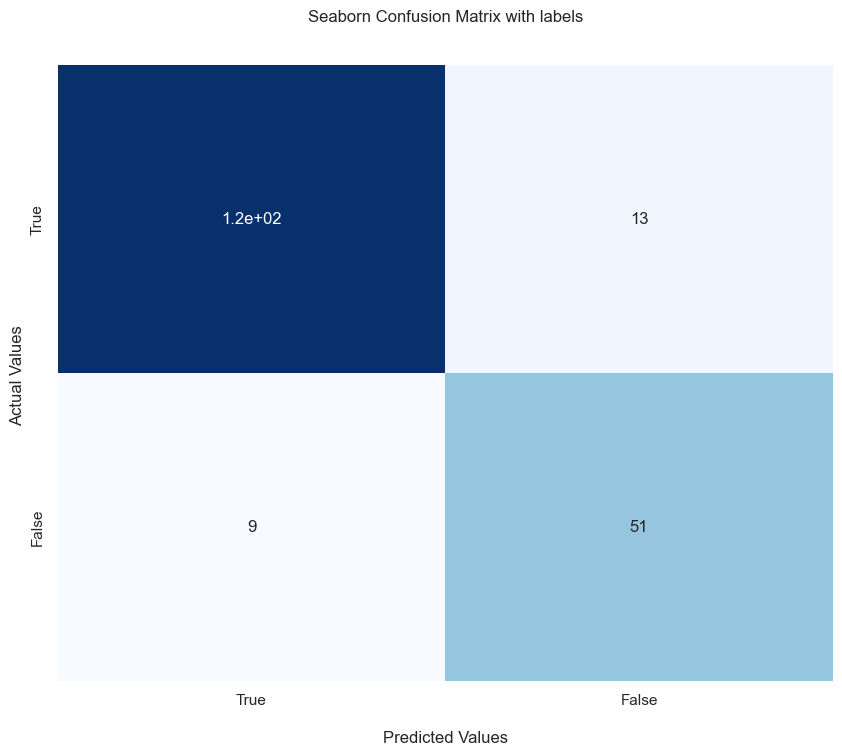

In [33]:
# Calculate the confusion matrix
cf_matrix = confusion_matrix(y_test, net_y_pred)

# Print the confusion matrix 
print(f"cf_matrix = {cf_matrix} \n")

# View the confusion matrix using the seaborn package
plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])
plt.show()

In [34]:
#Checking performance our model with classification report.
print(classification_report(y_test, net_y_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       128
           1       0.80      0.85      0.82        60

    accuracy                           0.88       188
   macro avg       0.86      0.87      0.87       188
weighted avg       0.89      0.88      0.88       188

